In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive/zop
!ls

/content/drive/MyDrive/zop
diabetes.csv  projekt2.ipynb  projekt.ipynb


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
df = pd.read_csv('./diabetes.csv')

# Manually removing outliers

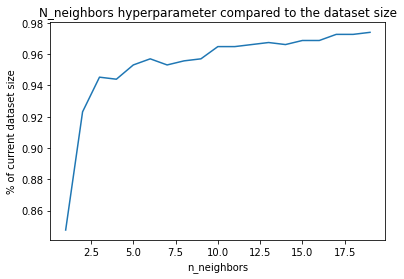

In [5]:
from sklearn.neighbors import LocalOutlierFactor

y = df['Outcome']
X = df.drop(columns=['Outcome'])

d = {}
for i in range(1, 20):
    lof = LocalOutlierFactor(n_neighbors=i)
    X_out = lof.fit_predict(X)
    
    d[i] = np.sum(X_out == 1)/len(X_out)

plt.plot(list(d.keys()), list(d.values()))
plt.xlabel('n_neighbors')
plt.ylabel('% of current dataset size')
plt.title('N_neighbors hyperparameter compared to the dataset size')
plt.show()

In [6]:
lof = LocalOutlierFactor(n_neighbors=4)
X_out = lof.fit_predict(X)

mask = X_out != -1

X = X.loc[mask, :]
y = y.loc[mask]

df = X[:]
df['Outcome'] = y[:]

print(len(X))
print(len(y))
print(len(df))

725
725
725


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [7]:
display(df[df['Pregnancies'] > 13])
df = df[df['Pregnancies'] <= 13]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [8]:
df[df['Glucose'] > 200]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [9]:
display(df[df['BloodPressure'] > 115])
df = df[df['BloodPressure'] <= 115]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [10]:
display(df[(df['BloodPressure'] < 40) & (df['BloodPressure'] != 0)])
df = df[(df['BloodPressure'] >= 40) | (df['BloodPressure'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
599,1,109,38,18,120,23.1,0.407,26,0


In [11]:
display(df[df['SkinThickness'] > 65])
df = df[df['SkinThickness'] <= 65]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [12]:
display(df[(df['Insulin'] > 500) & (df['Outcome'] == 0)])
df = df[(df['Insulin'] <= 500) | (df['Outcome'] == 1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
286,5,155,84,44,545,38.7,0.619,34,0


In [13]:
display(df[(df['BMI'] > 50) & (df['Outcome'] == 0)])
df = df[(df['BMI'] <= 50) | (df['Outcome'] == 1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
673,3,123,100,35,240,57.3,0.88,22,0


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,3.811978,120.683844,69.470752,20.278552,78.803621,31.955571,0.464336,32.997214,0.346797
std,3.246201,31.410967,18.110419,15.613010,108.080458,7.202455,0.319024,11.409824,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.238250,24.000000,0.000000
50%,3.000000,116.500000,72.000000,23.000000,36.500000,32.000000,0.365000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,130.000000,36.375000,0.613750,40.000000,1.000000
max,13.000000,199.000000,110.000000,60.000000,600.000000,52.300000,2.288000,70.000000,1.000000


# Removing missing values

In [15]:
print('      Glucose missing values: ',len(df[df['Glucose'] == 0.0]))
print('BloodPressure missing values: ',len(df[df['BloodPressure'] == 0.0]))
print('SkinThickness missing values: ',len(df[df['SkinThickness'] == 0.0]))
print('          BMI missing values: ',len(df[df['BMI'] == 0.0]))

      Glucose missing values:  5
BloodPressure missing values:  29
SkinThickness missing values:  214
          BMI missing values:  7


In [16]:
df.loc[df['Glucose'] == 0.0, 'Glucose'] = np.nan
df.loc[df['BMI'] == 0.0, 'BMI'] = np.nan
df.loc[df['SkinThickness'] == 0.0, 'SkinThickness'] = np.nan
df.loc[df['BloodPressure'] == 0.0, 'BloodPressure'] = np.nan
df = df.interpolate()

# Feature engineering

In [18]:
X = df.drop(columns=['Outcome'])
y = df[['Outcome']]

print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0            6    148.0           72.0  ...  33.6                     0.627   50
1            1     85.0           66.0  ...  26.6                     0.351   31
2            8    183.0           64.0  ...  23.3                     0.672   32
3            1     89.0           66.0  ...  28.1                     0.167   21
4            0    137.0           40.0  ...  43.1                     2.288   33

[5 rows x 8 columns]
   Outcome
0        1
1        0
2        1
3        0
4        1


<Figure size 1080x1080 with 0 Axes>

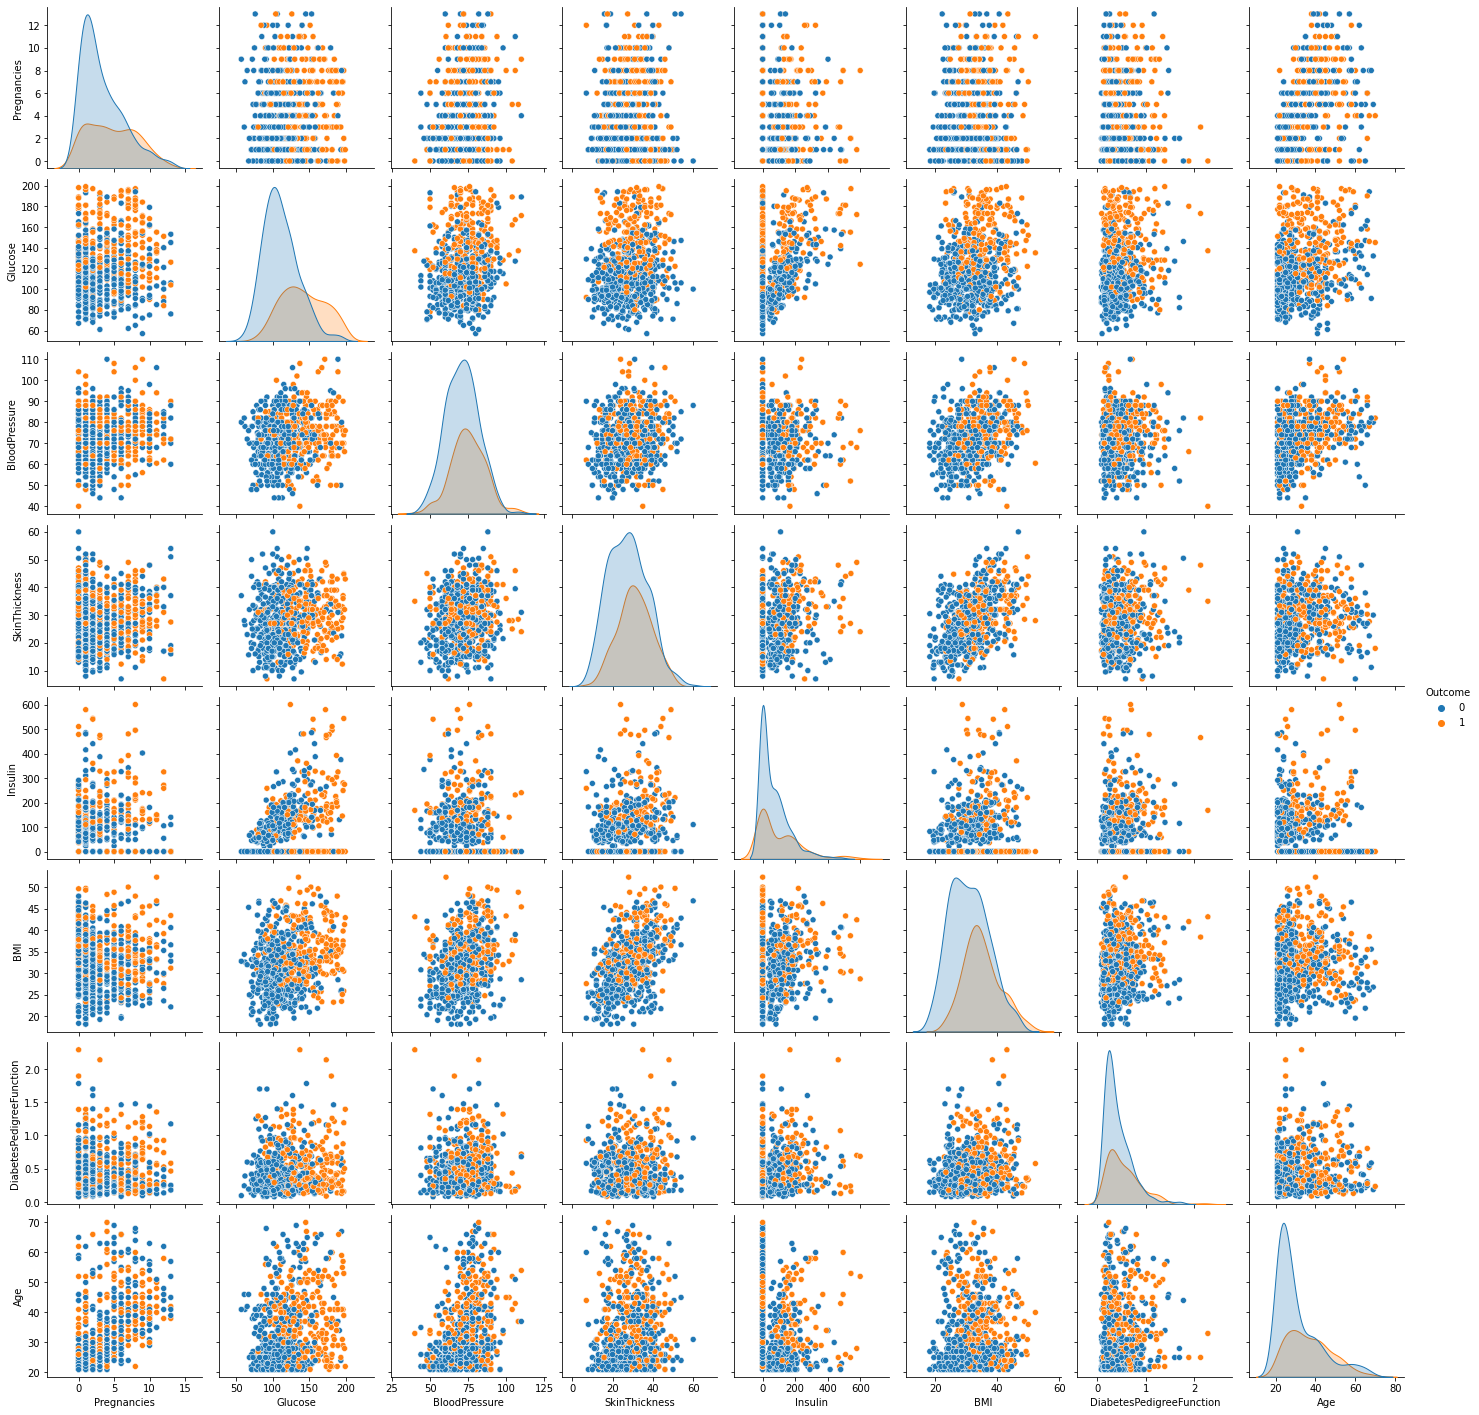

In [ ]:
plt.figure(figsize=(15, 15))
sb.pairplot(df, hue='Outcome')

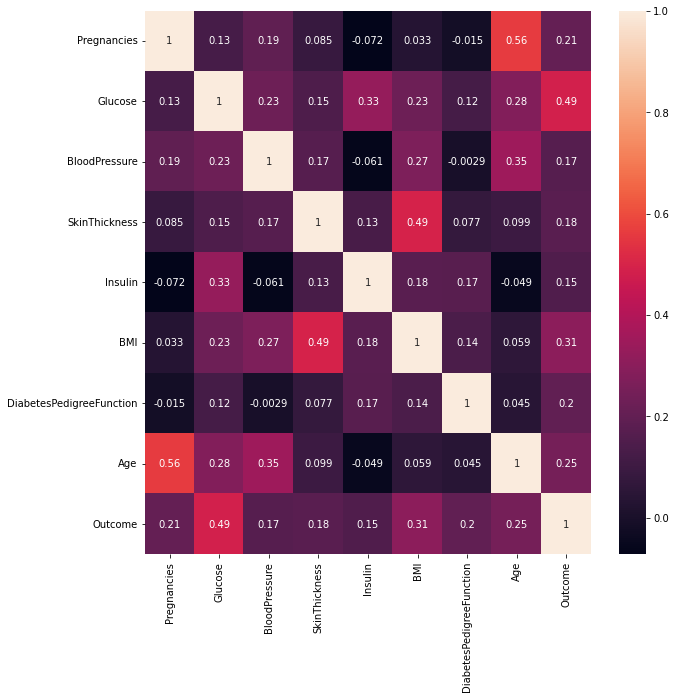

In [ ]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr(),  annot=True)

In [19]:
!pip install autofeat

In [20]:
from autofeat import AutoFeatRegressor, AutoFeatClassifier
model = AutoFeatClassifier(verbose=1, feateng_steps=3)
X = model.fit_transform(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[AutoFeat] The 3 step feature engineering process could generate up to 38556 features.
[AutoFeat] With 718 data points this new feature matrix would use about 0.11 gb of space.
[feateng] Step 1: transformation of original features
[feateng] Generated 37 transformed features from 8 original features - done.
[feateng] Step 2: first combination of features
[feateng] Generated 3875 feature combinations from 990 original feature tuples - done.
[feateng] Step 3: transformation of new features
[feateng] Generated 14500 transformed features from 3875 original features - done.
[feateng] Generated altogether 20138 new features in 3 steps
[feateng] Removing correlated features, as well as additions at the highest level
[feateng] Generated a total of 8148 additional features
[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 29 fe

In [21]:
print(np.array(X.columns.tolist()))

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' '1/(Age*Glucose)'
 'log(BMI**3*Glucose**3)' 'log(DiabetesPedigreeFunction*Glucose**3)'
 'Age**6*Pregnancies' '1/(Age**2*log(BMI))'
 '1/(Age**3 + SkinThickness**3)' '1/(-sqrt(BMI) + sqrt(Insulin))'
 'Age**3*DiabetesPedigreeFunction**3'
 'DiabetesPedigreeFunction*Pregnancies'
 '1/(sqrt(Pregnancies) - log(SkinThickness))']


# Deep learning model

In [ ]:
!pip install scikeras

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.2
    Uninstalling importlib-metadata-4.8.2:
      Successfully uninstalled importlib-metadata-4.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout, Flatten
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam, Adagrad, Adadelta, Adamax
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.regularizers import l1, l2
from keras.initializers import HeNormal, HeUniform, GlorotUniform, GlorotNormal
from keras.callbacks import EarlyStopping, LearningRateScheduler

In [ ]:
# def build_model(units0, act0, units1, act1, lr, opt):
#     model = Sequential()
#     model.add(Dense(
#         units=units0, activation=act0, input_shape=(len(X.columns.tolist()),),
#         kernel_regularizer=l1(1e-5),
#         bias_regularizer=l1(1e-5),
#         activity_regularizer=l1(1e-5))
#     )

#     model.add(Dense(
#         units=units1, activation=act1,
#         kernel_regularizer=l1(1e-5),
#         bias_regularizer=l1(1e-5),
#         activity_regularizer=l1(1e-5))
#     )

#     model.add(Dense(
#         units=1, activation='sigmoid',
#         kernel_regularizer=l1(1e-5),
#         bias_regularizer=l1(1e-5),
#         activity_regularizer=l1(1e-5))
#     )

#     model.compile(
#         optimizer=opt(learning_rate=lr),
#         loss=tf.keras.losses.BinaryCrossentropy(),
#         metrics=['accuracy']
#     )
#     return model

In [ ]:
X2 = StandardScaler().fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X2, y, test_size=0.3, shuffle=True)
model = Sequential()

model.add(Dense(
    1000,
    kernel_regularizer=l1(1e-3),
    kernel_initializer=HeNormal(),
    activation='relu',
    input_shape=(len(X.columns.tolist()),))
)

model.add(Dense(
    1000,
    kernel_regularizer=l1(1e-3),
    kernel_initializer=HeUniform(), # HeNormal, HeUniform, GlorotUniform, GlorotNormal
    activation='relu')
)

# model.add(Dropout(0.25))
# model.add(Flatten())

model.add(Dense(
    units=1,
    kernel_regularizer=l1(1e-3),
    activation='sigmoid')
)

model.compile(
    optimizer=Adam(learning_rate=0.0009),  # Adam, SGD, RMSprop, Nadam, Adagrad, Adadelta, Adamax
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

class_weight = compute_class_weight(y=y, classes=np.unique(y), class_weight='balanced')

num_epochs = 1000
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=num_epochs,
    validation_data=(X_val, y_val),
    class_weight={0: class_weight[0], 1: class_weight[1]},
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=70, restore_best_weights=True)]
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,


Epoch 1/1000
8/8 [==============================] - 2s 105ms/step - loss: 43.8443 - accuracy: 0.6235 - val_loss: 42.1162 - val_accuracy: 0.7083
Epoch 2/1000
8/8 [==============================] - 0s 59ms/step - loss: 40.3288 - accuracy: 0.7530 - val_loss: 38.1018 - val_accuracy: 0.7778
Epoch 3/1000
8/8 [==============================] - 0s 54ms/step - loss: 36.7716 - accuracy: 0.7211 - val_loss: 34.9292 - val_accuracy: 0.6806
Epoch 4/1000
8/8 [==============================] - 0s 65ms/step - loss: 33.3709 - accuracy: 0.7749 - val_loss: 31.5543 - val_accuracy: 0.8009
Epoch 5/1000
8/8 [==============================] - 0s 55ms/step - loss: 30.2074 - accuracy: 0.8048 - val_loss: 28.5258 - val_accuracy: 0.7731
Epoch 6/1000
8/8 [==============================] - 0s 51ms/step - loss: 27.1755 - accuracy: 0.8068 - val_loss: 25.6235 - val_accuracy: 0.7685
Epoch 7/1000
8/8 [==============================] - 0s 45ms/step - loss: 24.3216 - accuracy: 0.8347 - val_loss: 22.8848 - val_accuracy: 0.787

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)

# layers = [1, 20, 50, 100, 200, 350, 500]
# activations = ['relu', 'elu', 'selu', 'gelu', 'swish']
# lrs = [i*0.001 for i in range(1, 10)]
# opts = [Adam, SGD, RMSprop, Nadam, Adagrad, Adadelta, Adamax]

# model = KerasClassifier(model=build_model, epochs=60, batch_size=64)
# params = {
#     'units0': layers,
#     'act0': activations,
#     'units1': layers,
#     'act1': activations,
#     'lr': lrs,
#     'opt': opts
# }

# search = GridSearchCV(model, params)

# class_weight = compute_class_weight(y=y, classes=np.unique(y), class_weight='balanced')

# search.fit(
#     X_train, y_train,
#     batch_size=64,
#     epochs=num_epochs,
#     validation_data=(X_val, y_val),
#     class_weight={0: class_weight[0], 1: class_weight[1]},
# )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,


ValueError: ignored

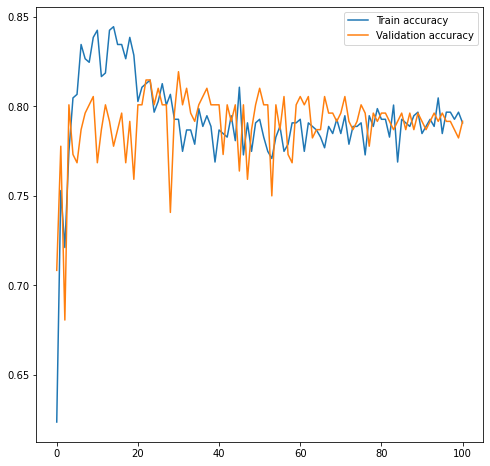

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label='Train accuracy')
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, SequentialFeatureSelector, f_classif
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[('f_sel', SelectKBest()), ('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
params = {
    'f_sel__score_func': [f_classif],
    'f_sel__k': list(range(1, len(X.columns.tolist())+1)),
    'knn__n_neighbors': list(range(2, 51)),
}

search = GridSearchCV(pipeline, params)
search.fit(X, y)
print(search.best_score_)
print(search.best_params_)

pipeline = Pipeline(steps=[('f_sel', SelectKBest()), ('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])
params = {
    'f_sel__score_func': [f_classif],
    'f_sel__k': list(range(1, len(X.columns.tolist())+1)),
    'knn__n_neighbors': list(range(2, 51)),
}

search = GridSearchCV(pipeline, params)
search.fit(X, y)
print(search.best_score_)
print(search.best_params_)

0.7800407925407925
{'f_sel__k': 18, 'f_sel__score_func': <function f_classif at 0x7f58d30704d0>, 'knn__n_neighbors': 21}
0.7772533022533024
{'f_sel__k': 17, 'f_sel__score_func': <function f_classif at 0x7f58d30704d0>, 'knn__n_neighbors': 37}


In [23]:
!pip install featurewiz

Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
    Since dask_xgboost_flag is True, reducing memory size and loading into dask
    Caution: We will try to reduce the memory usage of dataframe from 0.05 MB
    Memory usage after optimization is: 0.02 MB
        decreased by 71.2%
    Converted pandas dataframe into a Dask dataframe ...
Loading test data...
    Since dask_xgboost_flag is True, reducing memory size and loading into dask
    No file given. Continuing...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
GPU active on this device
    Running XGBoost using GPU parameters
Removing 0 columns from further processing since ID or low information variables
    columns removed: []
    After re

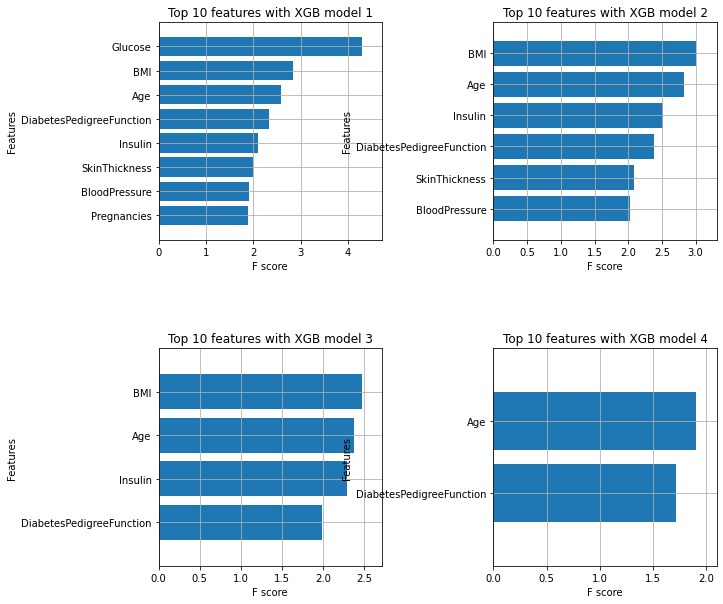

Selected 8 important features:
['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'BloodPressure', 'Pregnancies']
    Time taken = 11 seconds
Returning list of 8 important features and dataframe.


In [27]:
import pandas as pd
from featurewiz import featurewiz

features = featurewiz(df, target='Outcome', corr_limit=0.70, verbose=2)

In [42]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())
])

params = {
    'knn__n_neighbors': list(range(2, 51)),
}

search = GridSearchCV(pipeline, params)
search.fit(features[1], y)
print(search.best_score_)
print(search.best_params_)
print(search.cv_results_['mean_test_score'],'\n')

pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler()), 
    ('knn', KNeighborsClassifier())
])
params = {
    'knn__n_neighbors': list(range(2, 51)),
}

search = GridSearchCV(pipeline, params)
search.fit(features[1], y)
print(search.best_score_)
print(search.best_params_)
print(search.cv_results_['mean_test_score'])

0.9986111111111111
{'knn__n_neighbors': 18}
[0.99582362 0.99442502 0.99442502 0.99581391 0.9986014  0.9972028
 0.99721251 0.99581391 0.99721251 0.99581391 0.99581391 0.99581391
 0.99581391 0.99581391 0.99581391 0.99581391 0.99861111 0.99581391
 0.99721251 0.99581391 0.99721251 0.99442502 0.99442502 0.99442502
 0.99442502 0.99442502 0.99303613 0.99442502 0.99164724 0.99303613
 0.99443473 0.99303613 0.99443473 0.99303613 0.99443473 0.99442502
 0.99582362 0.99442502 0.99303613 0.99442502 0.99303613 0.99442502
 0.99442502 0.99442502 0.99442502 0.99442502 0.99442502 0.99442502
 0.99442502] 

1.0
{'knn__n_neighbors': 2}
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


In [44]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

knn1 = KNeighborsClassifier(n_neighbors=2)
knn2 = KNeighborsClassifier(n_neighbors=18)

acc1, acc2 = [], []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(features[1], y, test_size=0.2)

    X_stand_train = standard_scaler.fit_transform(X_train)
    X_stand_test = standard_scaler.transform(X_test)

    knn1.fit(X_stand_train, y_train)
    acc1.append(accuracy_score(knn1.predict(X_stand_test), y_test))


    X_minmax_train = minmax_scaler.fit_transform(X_train)
    X_minmax_test = minmax_scaler.transform(X_test)

    knn2.fit(X_minmax_train, y_train)
    acc2.append(accuracy_score(knn2.predict(X_minmax_test), y_test))

print(f'1st model acc: {np.mean(acc1)}')
print(f'2nd model acc: {np.mean(acc2)}')

1st model acc: 0.9945833333333333
2nd model acc: 1.0
